### Multiprocessing - test

In [1]:
import multiprocessing

print("Number of cpu : ", multiprocessing.cpu_count())

Number of cpu :  4


### NOTE: Preprocessing template. 

Why use Pool() and not Process()?

https://towardsdatascience.com/speed-up-your-algorithms-part-3-parallelization-4d95c0888748

In [2]:
# def find_rmse(reg, X_test,y_test,X_train, y_train):
   
#     df_train = train_df
#     df_test = test_df

#     X_train = X_train
#     y_train = y_train

#     X_test = X_test
#     y_test = y_test

#     reg.fit(X_train, y_train)

#     y_out = reg.predict(X_test)

#     error = np.sqrt(mean_squared_error(y_test, y_out))
                                
#     print(str(error)+ repr(reg)[0:4]) #using repr to get initials of the name of the classifier that this run used

In [3]:
# from multiprocessing import Pool

# #Add imported classes of classification models to be used.
# regressors_list = [ElasticNet(),RandomForestRegressor(),nuSVM(),Ridge()] 
# p = Pool(4)
# pool.map(find_rmse,regressors_list)
# pool.close()
# pool.join()

In [4]:
from multiprocessing import Process


def print_func(continent='Asia'):
    print('The name of continent is : ', continent)

if __name__ == "__main__":  # confirms that the code is under main function
    names = ['America', 'Europe', 'Africa']
    procs = []
    proc = Process(target=print_func)  # instantiating without any argument
    procs.append(proc)
    proc.start()

    # instantiating process with arguments
    for name in names:
        # print(name)
        proc = Process(target=print_func, args=(name,))
        procs.append(proc)
        proc.start()


The name of continent is :  Asia
The name of continent is :  America
The name of continent is :  Europe
The name of continent is :  Africa


In [5]:
# import 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [6]:
# Function to crate a figure and get instance of Axis.
def axex(size):
    fig = plt.figure(figsize=(size[0],size[1])) # define plot area
    ax = fig.gca() # define axis  
    return ax

In [7]:
loan_data = pd.read_csv('./Hackathon/Data/train.csv',low_memory=False)

In [8]:
loan_data.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [9]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

In [10]:
loan_data.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [11]:
#  Count of unique member id
len(loan_data['UniqueID'].value_counts())

233154

In [12]:
type(loan_data['Date.of.Birth'][0])

str

In [13]:
# loan_data['loan_amnt'].isnull().sum()

# Function to find sum and percent of missing values for each column.
# Remove the one's that have no missing values.

def missing_values(df):
#     Sum null values. Then divide by the total occurrence
    sum = (df == 0).sum() 
    percent = (df == 0).sum()/len(df)*100
    missing_stats = pd.concat([sum, percent], axis=1).rename(
        columns = {
            0: 'Number',
            1: 'Percent'
        }
    )
#   drop all rows that are equal to 0.
    missing_stats = missing_stats[missing_stats.iloc[:,1] != 0]
    missing_stats.reset_index(inplace=True)
    missing_stats.sort_values('Percent', inplace=True)
    
    return missing_stats


In [14]:
missing_values(loan_data)

,index,Number,Percent
0,Aadhar_flag,37230,15.967987
6,PRI.NO.OF.ACCTS,116950,50.159980
5,PERFORM_CNS.SCORE,116950,50.159980
7,PRI.ACTIVE.ACCTS,137016,58.766309
10,PRI.SANCTIONED.AMOUNT,138096,59.229522
11,PRI.DISBURSED.AMOUNT,138204,59.275843
9,PRI.CURRENT.BALANCE,141696,60.773566
18,PRIMARY.INSTAL.AMT,159517,68.417012
20,NEW.ACCTS.IN.LAST.SIX.MONTHS,181494,77.842971
23,loan_default,182543,78.292888


In [15]:
#  Removing columns with more than 70% of missing data.
# Get a threshold of what is 30% 
# print(loan_data.count())

# temp = [i for i in loan_data.count()<887379 *0.30]
# loan_data.drop(loan_data.columns[temp],axis=1,inplace=True)

# EDA

## Loan data vs...

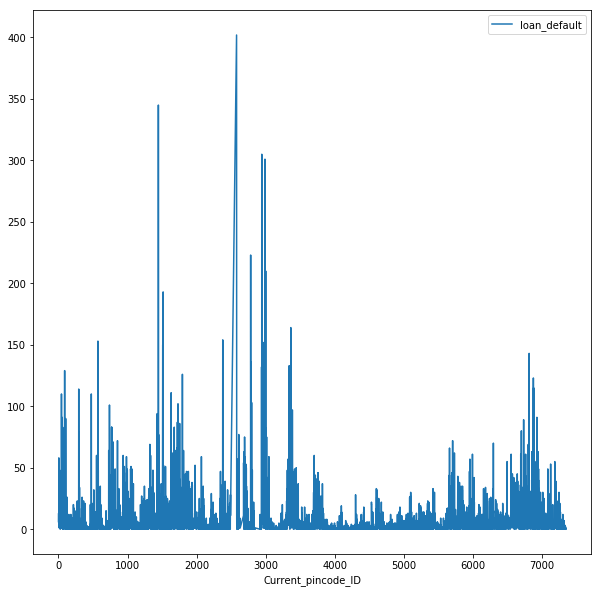

In [16]:
ax = axex([10,10])

# Average annual income plot
loan_data[['loan_default', 'Current_pincode_ID']].groupby(['Current_pincode_ID']).sum().plot(ax = ax)

## Data distribution

LTV vs distribution
ltv vs amount
LD of salaried and self_employed

In [17]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=3,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[2].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        print(len(temp.unique()))
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                if p.get_height() > 0:
                    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()

In [18]:
temp = pd.Series(data = 'hue')

### Continuous variables

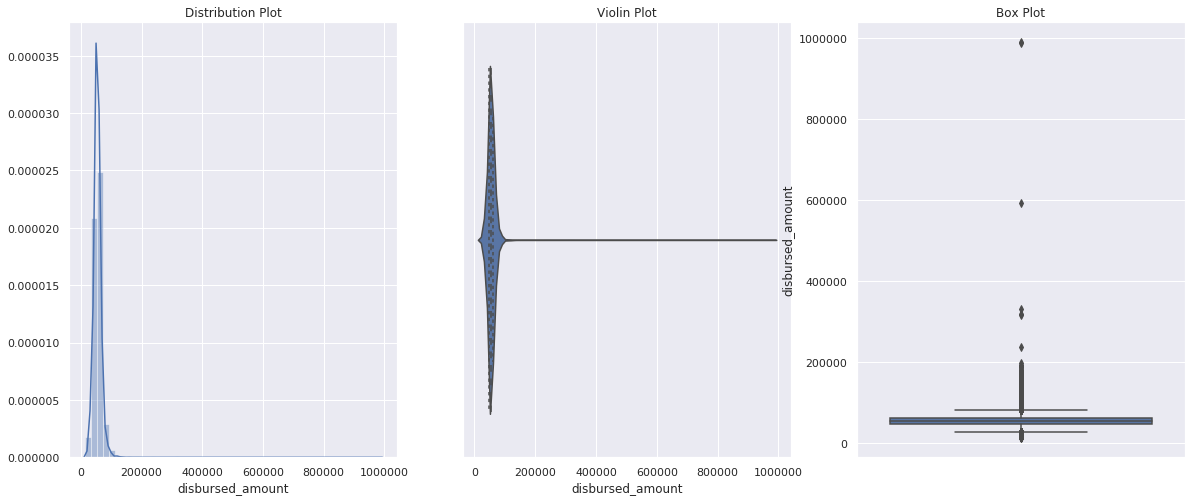

In [19]:
# dibursed_amount
univariate(df=loan_data,col='disbursed_amount',vartype=0)

In [20]:
# loan_data.loc[(loan_data['disbursed_amount'] > 180000)]['loan_default']

loan_data.disbursed_amount.describe()

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: disbursed_amount, dtype: float64

In [21]:
loan_data.loc[(loan_data['disbursed_amount'] > 100000) &\
              (loan_data['loan_default'] == 0)]['loan_default'].count()

660

__Remove rows containing anomalies (amt > 1lk)? what do these anomalies mean?__

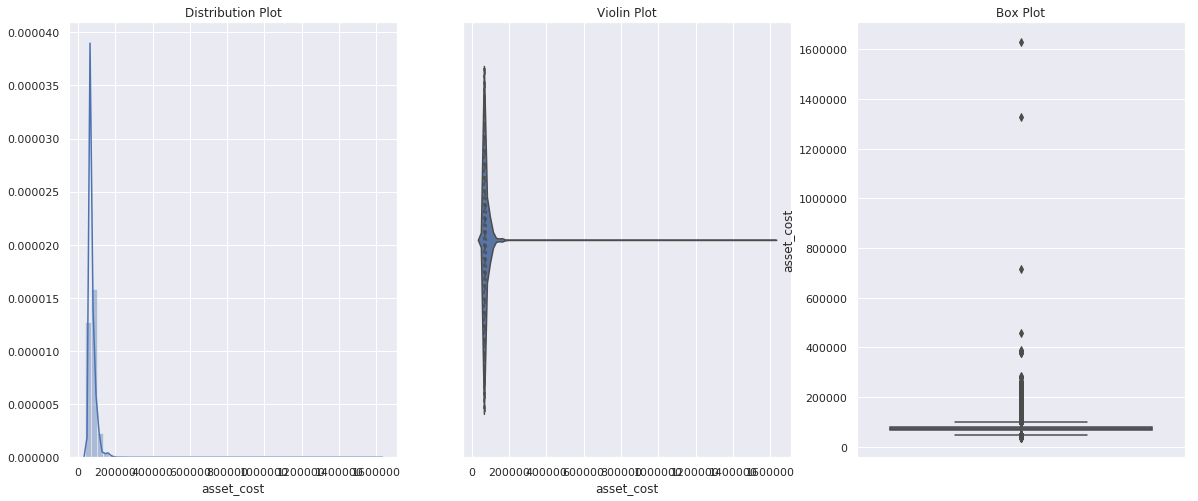

In [22]:
univariate(df=loan_data,col='asset_cost',vartype=0)

__drop asset_cost > 1lkh?__

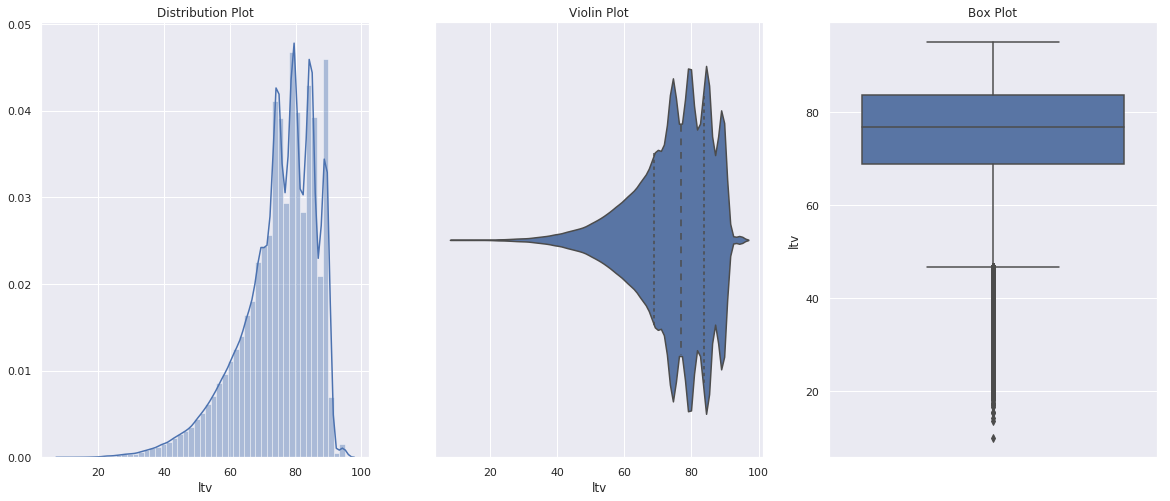

In [23]:
univariate(df=loan_data,col='ltv',vartype=0)

In [24]:
loan_data.ltv.describe()

count    233154.000000
mean         74.746530
std          11.456636
min          10.030000
25%          68.880000
50%          76.800000
75%          83.670000
max          95.000000
Name: ltv, dtype: float64

In [25]:
loan_data.loc[(loan_data['ltv'] < 48) & (loan_data['disbursed_amount'] > 100000)]

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
115043,644043,118218,255315,47.00,136,23432,51,3753,03-01-95,Salaried,...,0,0,0,0,0,0,0yrs 8mon,0yrs 8mon,0,1
173597,570402,126296,286350,45.40,138,13941,51,3300,10-05-95,Salaried,...,0,0,0,0,3,0,0yrs 8mon,2yrs 9mon,0,0
173619,457145,115727,277600,43.23,138,13941,51,3358,20-10-94,Salaried,...,0,0,0,0,1,0,1yrs 6mon,4yrs 0mon,0,0
193778,636733,102477,247078,42.79,146,21344,51,2998,08-02-99,NaN,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,0


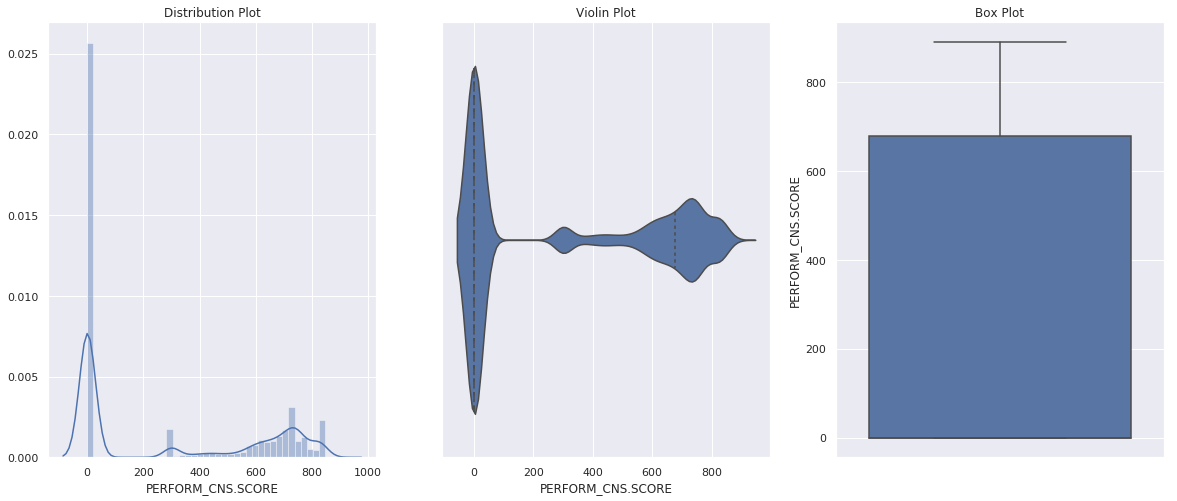

In [26]:
# distribution of cns score
univariate(df=loan_data,col='PERFORM_CNS.SCORE',vartype=0)

In [27]:
loan_data['PERFORM_CNS.SCORE'].describe()

count    233154.000000
mean        289.462994
std         338.374779
min           0.000000
25%           0.000000
50%           0.000000
75%         678.000000
max         890.000000
Name: PERFORM_CNS.SCORE, dtype: float64

In [28]:
# Default and no credit rating score
x = len(loan_data.loc[(loan_data['PERFORM_CNS.SCORE'] == 0) &\
              (loan_data['loan_default'] == 1)])

y = len(loan_data.loc[(loan_data['PERFORM_CNS.SCORE'] == 0)])

# percent defaulted with no CNS score.
print(x/y)

0.23131252672082087


In [29]:
loan_data['PRIMARY.INSTAL.AMT'].head()

0       0
1    1991
2       0
3      31
4       0
Name: PRIMARY.INSTAL.AMT, dtype: int64

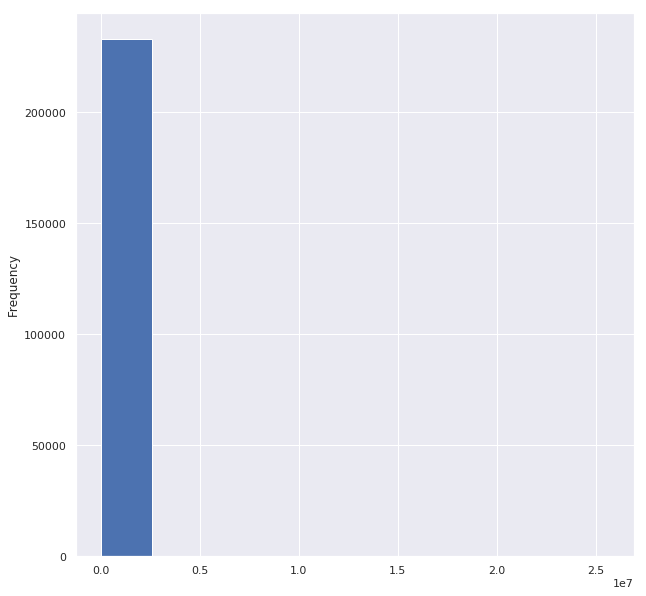

In [30]:
# distribution of EMI amount
# univariate(df=loan_data,col='PRIMARY.INSTAL.AMT',vartype=0)
ax = axex([10,10])
loan_data['PRIMARY.INSTAL.AMT'].plot.hist(ax=ax)

### Categorical Variables

In [31]:
len(loan_data)

233154

0


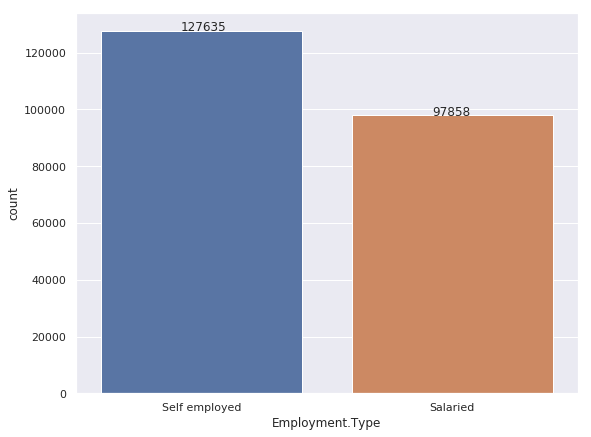

In [32]:
# Employment type count plot
univariate(df=loan_data,col='Employment.Type',vartype=1)

0


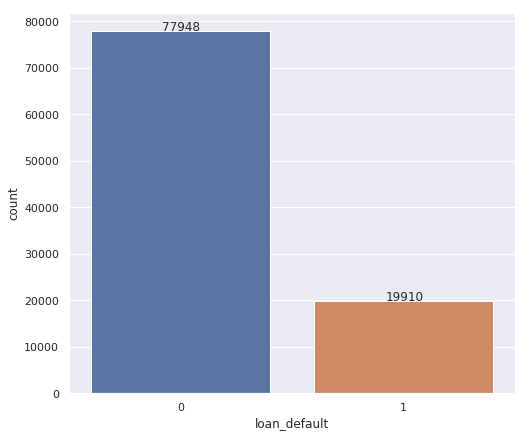

In [33]:
univariate(df=loan_data[(loan_data['Employment.Type'] == 'Salaried')],col='loan_default',vartype=1)

In [34]:
19910/77948

0.25542669471955665

0


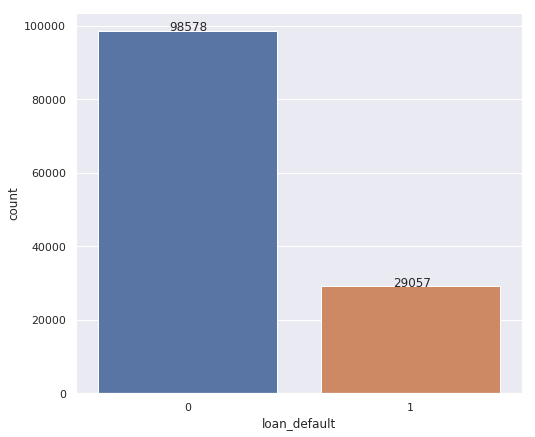

In [35]:
univariate(df=loan_data[(loan_data['Employment.Type'] == 'Self employed')],col='loan_default',vartype=1)

In [36]:
29057/98578

0.29476150865304634

0


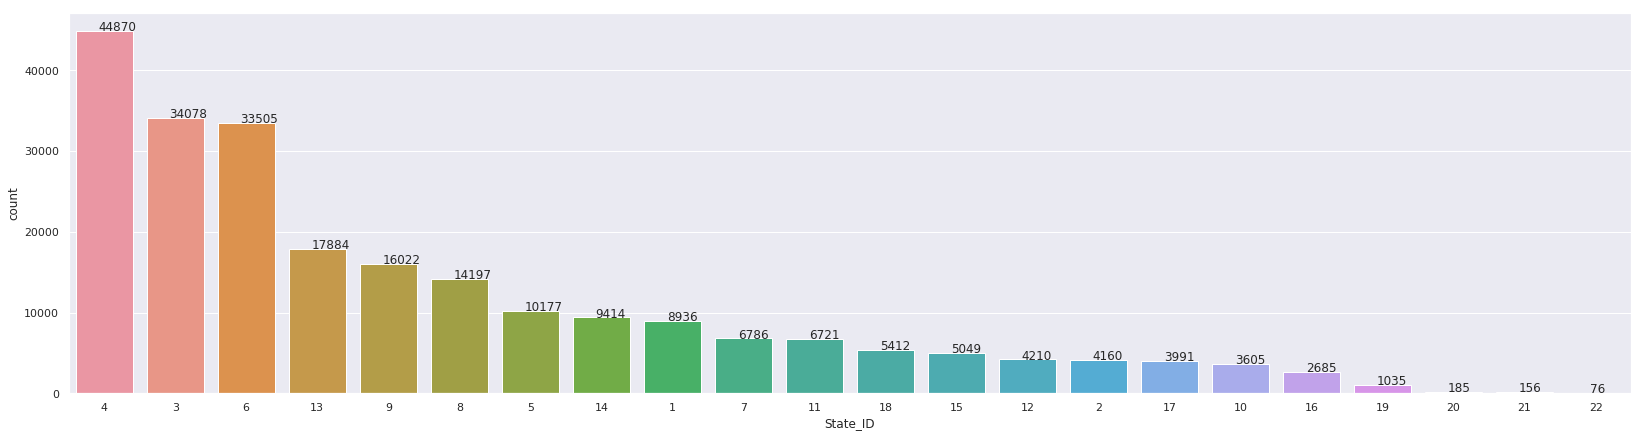

In [37]:
# Count of loan applicant from each state
univariate(df=loan_data,col='State_ID',vartype=1)

1


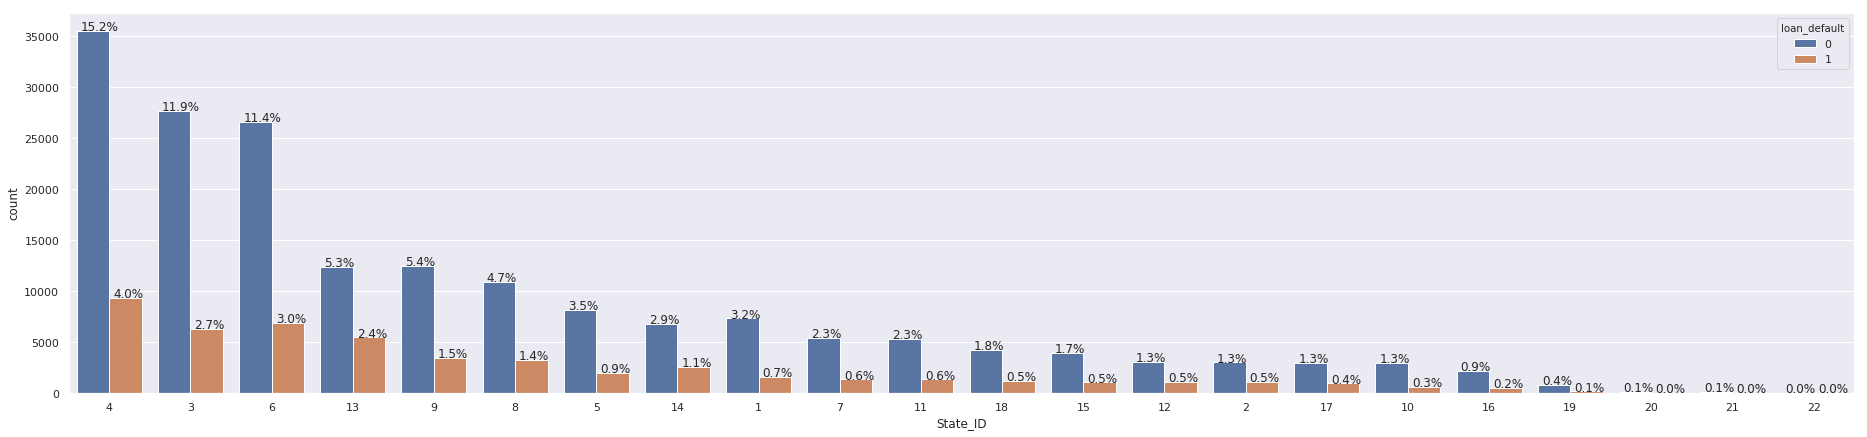

In [38]:
# LD vs Sate
univariate(df=loan_data,col='State_ID',vartype=1, hue='loan_default')


0


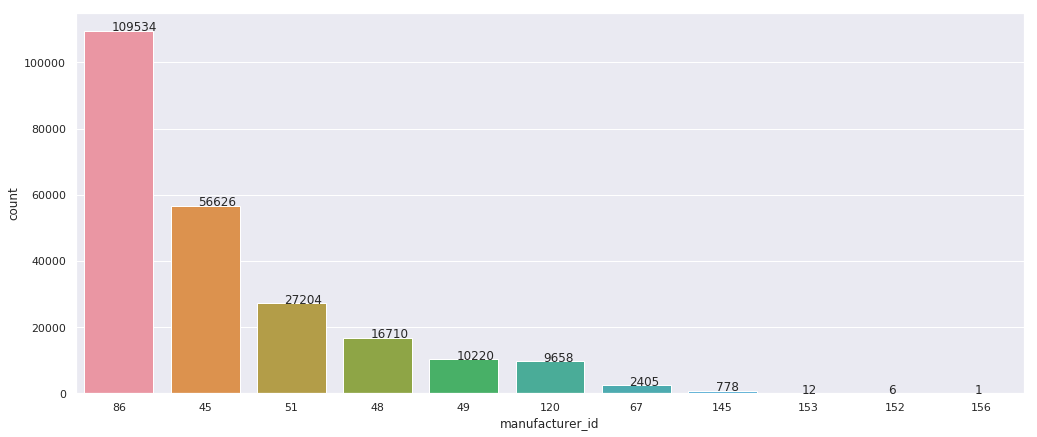

In [39]:
# Count of instances per manufacturer
univariate(df=loan_data,col='manufacturer_id',vartype=1)

In [40]:
len(loan_data.loc[(loan_data['manufacturer_id'] == 152) |\
              (loan_data['manufacturer_id'] == 153) |\
              (loan_data['manufacturer_id'] == 156)
             ])

19

Drop manu_id 152, 153, 156 ? total == 19 

In [41]:
loan_data['manufacturer_id'].value_counts().index

Int64Index([86, 45, 51, 48, 49, 120, 67, 145, 153, 152, 156], dtype='int64')

In [42]:
loan_data.loc[(loan_data['manufacturer_id'] == 153) & (loan_data['loan_default']==1)]['loan_default']


109289    1
172981    1
173002    1
227131    1
Name: loan_default, dtype: int64

In [43]:
# --------ANAAAALYSISSSSSSSSS-------------
# fig, ax = plt.subplots()
# fig.set_size_inches(20 ,20 )
# ax = sns.countplot(data = loan_data, x= 'manufacturer_id', order=loan_data['manufacturer_id'].\
#                    value_counts().index,hue = 'loan_default')
# for p in ax.patches:
# #     
#     if p.get_height() > 0:
#         print(p.get_height())
#         ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))),\
#                     (p.get_x()+0.05, p.get_height()+20))

1


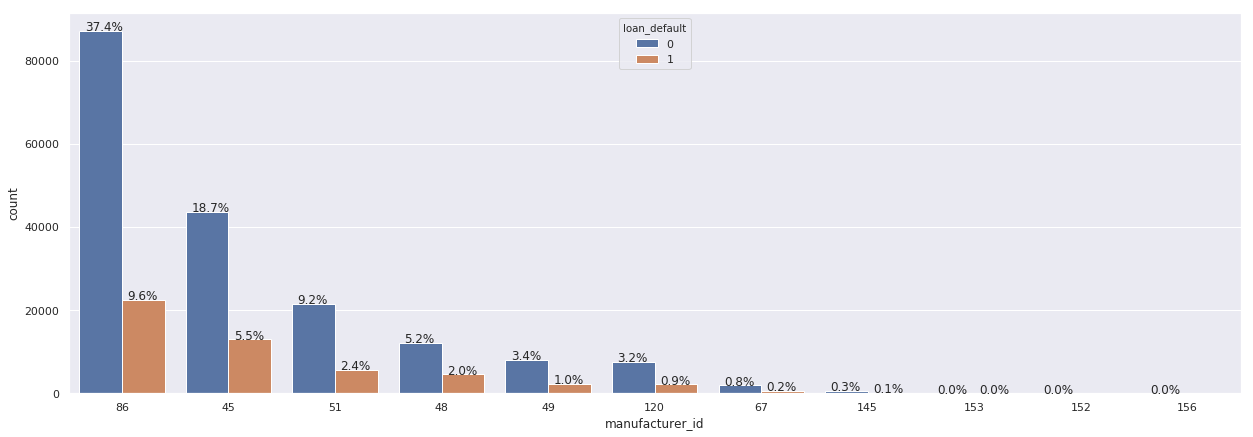

In [44]:
# LD vs manufacturer

'''
    152 and 156 have no defaults. p.get_height() is returning a nan value if value = 0.
    153 has 4 loan_defaults. percentage base is entire df len. therefore 0% for 153 comes 
    after flooring the percent value.
    '''
univariate(df=loan_data,col='manufacturer_id',vartype=1, hue='loan_default')


Text(0, 0.5, 'LD')

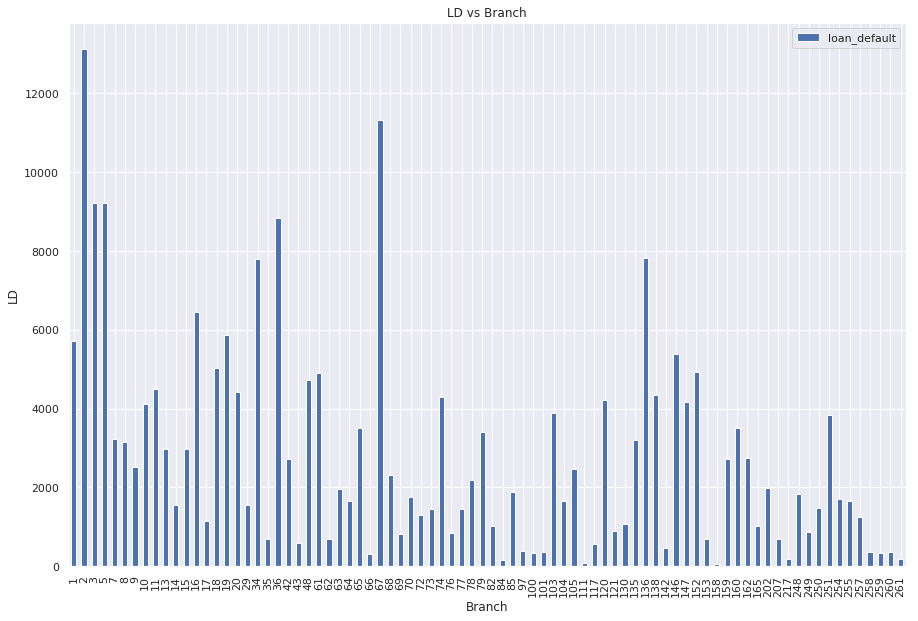

In [45]:
# # Count of instances per branch_id
# univariate(df=loan_data,col='branch_id',vartype=1)

# LD grouped by branchid. 

ax = axex([15,10])

loan_data[['loan_default', 'branch_id']].\
    groupby('branch_id').\
    count().\
    plot.bar(ax=ax)


ax.set_title('LD vs Branch')
ax.set_xlabel('Branch')
ax.set_ylabel('LD')

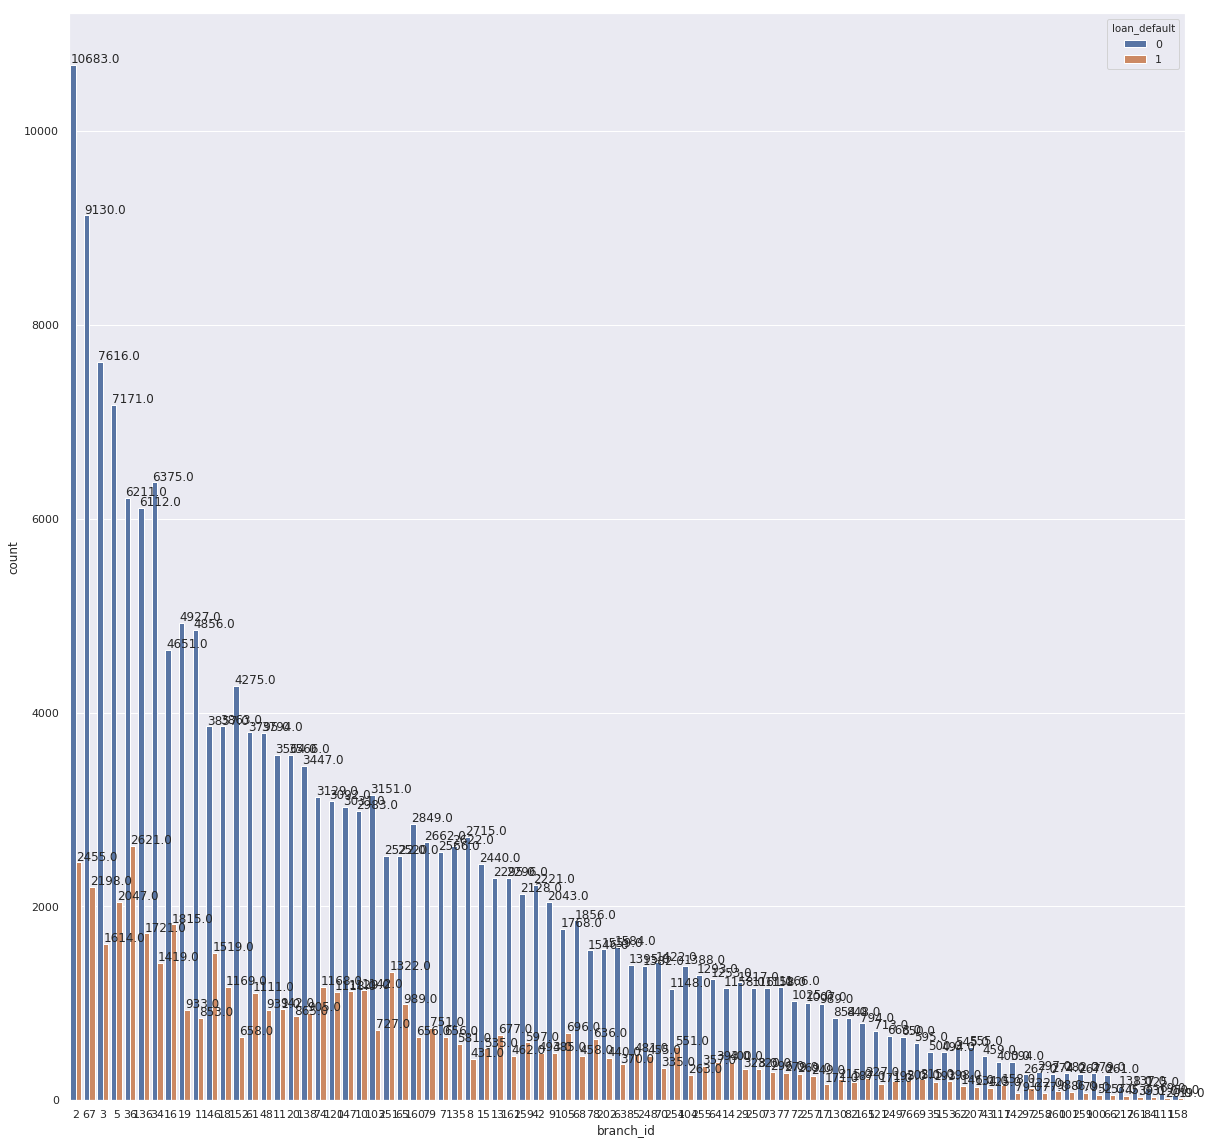

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(20 ,20)
ax = sns.countplot(data = loan_data, x= 'branch_id', order=loan_data['branch_id'].\
                   value_counts().index,hue = 'loan_default')
for p in ax.patches:
#     
    if p.get_height() > 0:
        ax.annotate('{:1.1f}'.format((p.get_height())),\
                    (p.get_x()+0.05, p.get_height()+20))

## Bivariate plots 
__relation of 2 features to the target(categorical type)__ Used to check correlation of the features.

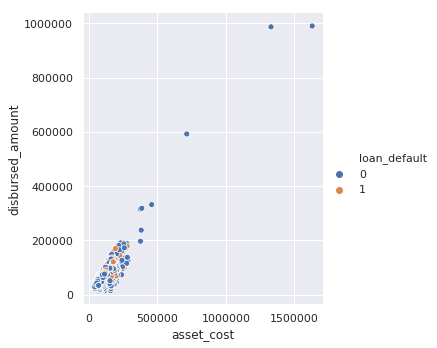

In [47]:
sns.relplot(x="asset_cost", y="disbursed_amount", hue="loan_default", data=loan_data);

__Probably confirms removing val > 1lkh based on disbursed_amount and asset_cost distribution__

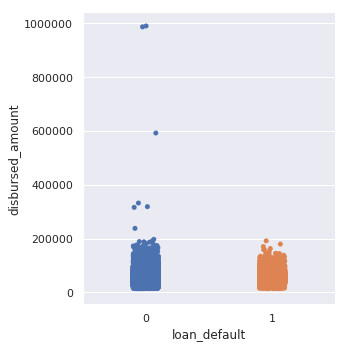

In [48]:
sns.catplot(x="loan_default", y="disbursed_amount", data=loan_data);

<Figure size 1152x864 with 0 Axes>

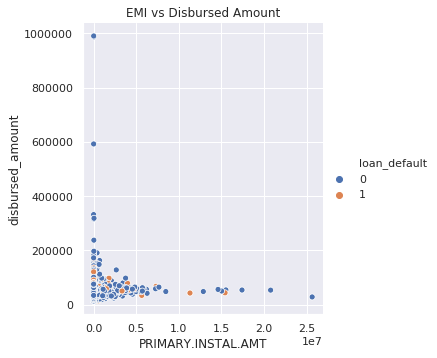

In [49]:
plt.figure(figsize=(16,12))
sns.relplot(data =loan_data, x='PRIMARY.INSTAL.AMT', y='disbursed_amount', hue ='loan_default')
plt.title('EMI vs Disbursed Amount')
plt.show()

### Correlation Map

In [50]:
# loan_correlation = loan_data.corr()
# loan_correlation

In [51]:
# f, ax = plt.subplots(figsize=(14, 9))
# sns.heatmap(loan_correlation, 
#             xticklabels=loan_correlation.columns.values,
#             yticklabels=loan_correlation.columns.values,annot= True)
# plt.show()

# Feature Engineering

In [52]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
UniqueID                               233154 non-null int64
disbursed_amount                       233154 non-null int64
asset_cost                             233154 non-null int64
ltv                                    233154 non-null float64
branch_id                              233154 non-null int64
supplier_id                            233154 non-null int64
manufacturer_id                        233154 non-null int64
Current_pincode_ID                     233154 non-null int64
Date.of.Birth                          233154 non-null object
Employment.Type                        225493 non-null object
DisbursalDate                          233154 non-null object
State_ID                               233154 non-null int64
Employee_code_ID                       233154 non-null int64
MobileNo_Avl_Flag                      233154 non-null int64
Aadhar_flag                   

### Changing duration to number of months

In [53]:
loan_data['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [54]:
loan_data['avg_tenure'] = loan_data['AVERAGE.ACCT.AGE'].str.replace(r'[a-zA-Z]*', '')
loan_data['cred_hist_len'] = loan_data['CREDIT.HISTORY.LENGTH'].str.replace(r'[a-zA-Z]*', '')

In [55]:
import re

def pat1(x):
    result = re.search('([0-9]*) [0-9]*', x)
    return int(result.group(1))

def pat2(x):
    result = re.search('[0-9]* ([0-9]*)', x)
    return int(result.group(1))
    

In [57]:
# pat2('0 2')
loan_data['avg_tenure'] = loan_data['avg_tenure'].apply(lambda x: pat1(x)*12 + pat2(x))
loan_data['cred_hist_len'] = loan_data['cred_hist_len'].apply(lambda x: pat1(x)*12 + pat2(x))

### Create age from DOB

In [64]:
now = pd.Timestamp('now')
loan_data['Date.of.Birth'] = pd.to_datetime(loan_data['Date.of.Birth'])
loan_data['Date.of.Birth'] = loan_data['Date.of.Birth'].where(loan_data['Date.of.Birth'] < now, loan_data['Date.of.Birth'] -  np.timedelta64(100, 'Y'))
loan_data['age'] = (now - loan_data['Date.of.Birth']).astype('int8')

In [67]:
loan_data['age']

0         35
1         33
2         33
3         25
4         41
5         28
6         31
7         30
8         27
9         51
10        40
11        34
12        45
13        34
14        46
15        24
16        43
17        36
18        30
19        38
20        41
21        35
22        24
23        39
24        30
25        33
26        51
27        43
28        46
29        49
          ..
233124    34
233125    30
233126    45
233127    42
233128    49
233129    38
233130    55
233131    24
233132    27
233133    38
233134    38
233135    23
233136    47
233137    45
233138    36
233139    37
233140    30
233141    22
233142    25
233143    52
233144    55
233145    33
233146    36
233147    29
233148    25
233149    31
233150    30
233151    43
233152    25
233153    35
Name: age, Length: 233154, dtype: int8

### Convert employment type to numerical format

In [68]:
# 1 - Salaried
# 0 - Self-employed

loan_data['Employment.Type'] = loan_data['Employment.Type'].map({'Salaried': 1, 'Self employed' : 0}).astype('int8')

In [69]:
loan_data['Employment.Type']

0         1.0
1         0.0
2         0.0
3         0.0
4         0.0
5         0.0
6         1.0
7         1.0
8         0.0
9         1.0
10        0.0
11        1.0
12        1.0
13        1.0
14        0.0
15        1.0
16        0.0
17        0.0
18        0.0
19        0.0
20        0.0
21        1.0
22        0.0
23        0.0
24        0.0
25        1.0
26        0.0
27        0.0
28        0.0
29        0.0
         ... 
233124    1.0
233125    1.0
233126    0.0
233127    0.0
233128    1.0
233129    1.0
233130    1.0
233131    0.0
233132    0.0
233133    1.0
233134    0.0
233135    1.0
233136    1.0
233137    0.0
233138    1.0
233139    0.0
233140    0.0
233141    1.0
233142    0.0
233143    0.0
233144    1.0
233145    0.0
233146    0.0
233147    1.0
233148    1.0
233149    1.0
233150    0.0
233151    1.0
233152    1.0
233153    1.0
Name: Employment.Type, Length: 233154, dtype: float64